### SpaceShip Titanic Visualization 
I have used the following dataset to visualize the dataset:
https://www.kaggle.com/competitions/spaceship-titanic/data

I will be using various visualizations to see the datasets dependancy on whether a passenger is to be transported to their city or not

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [20]:
dataset=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")

#### I am printing first 10 data values of dataset

In [21]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [22]:
dataset.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

#### The columns of the dataset are:['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age','VIP', 'RoomService', 'FoodCourt', 'ShoppingMall','Spa', 'VRDeck','Name', 'Transported']

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_32/3907988901.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


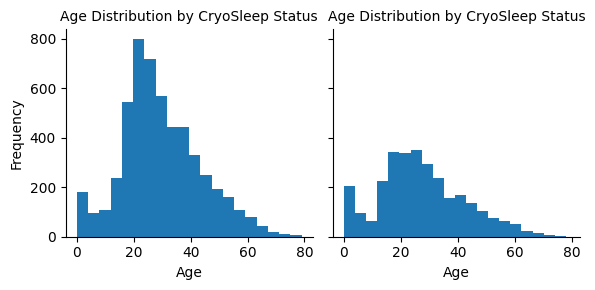

In [27]:
g = sns.FacetGrid(data=dataset, col='CryoSleep')
g.map(plt.hist, 'Age', bins=20)
g.set_xlabels('Age')
g.set_ylabels('Frequency')
g.set_titles('Age Distribution by CryoSleep Status')
plt.tight_layout()
plt.show()

#### The below visualization shows distribution of ages,destination, cryosleep count and VIP status count

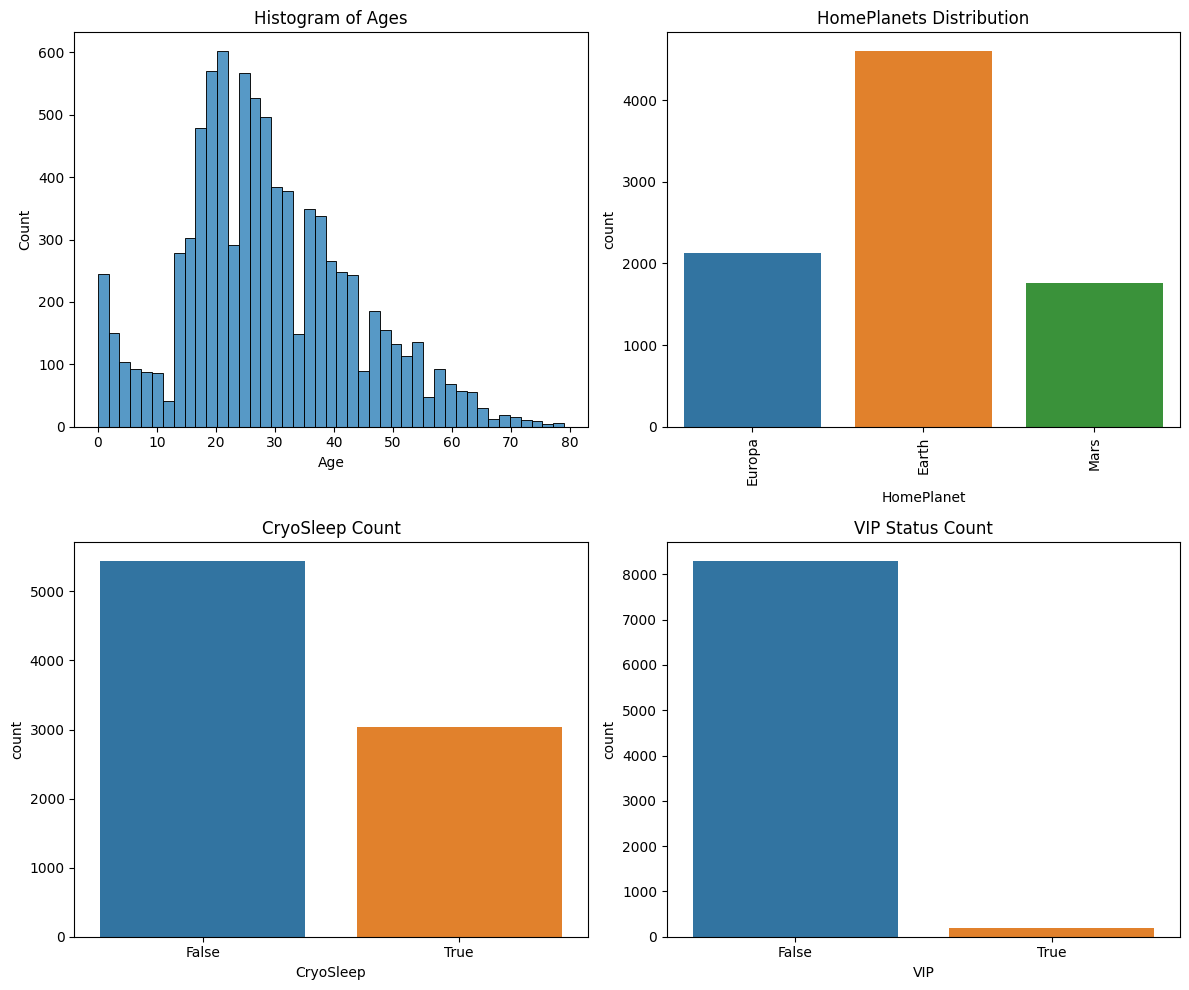

In [24]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Visualization 1: Histogram of Ages
sns.histplot(data=dataset, x='Age', ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Ages')

# Visualization 2: Bar Chart of HomePlanets
sns.countplot(data=dataset, x='HomePlanet', ax=axes[0, 1])
axes[0, 1].set_title('HomePlanets Distribution')
axes[0, 1].tick_params(axis='x', rotation=90)

# Visualization 3: Count Plot of CryoSleep
sns.countplot(data=dataset, x='CryoSleep', ax=axes[1, 0])
axes[1, 0].set_title('CryoSleep Count')

# Visualization 4: Count Plot of VIP Status
sns.countplot(data=dataset, x='VIP', ax=axes[1, 1])
axes[1, 1].set_title('VIP Status Count')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()


#### We show whether which VIPs are being transported based on their VIPStatus

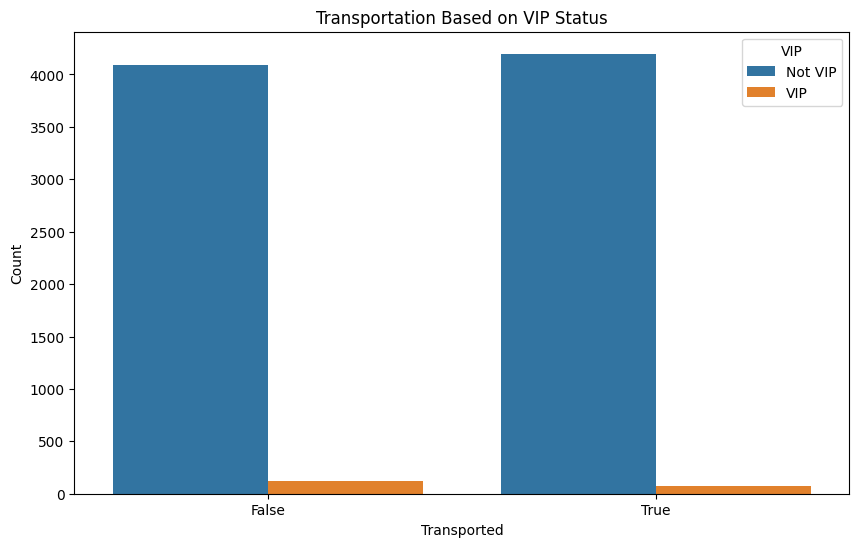

In [30]:
# Create a count plot for conditions of transportation
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Transported', hue='VIP')
plt.title('Transportation Based on VIP Status')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.legend(title='VIP', labels=['Not VIP', 'VIP'])
plt.show()

#### We will show age distribution of transported and non-transported passengers

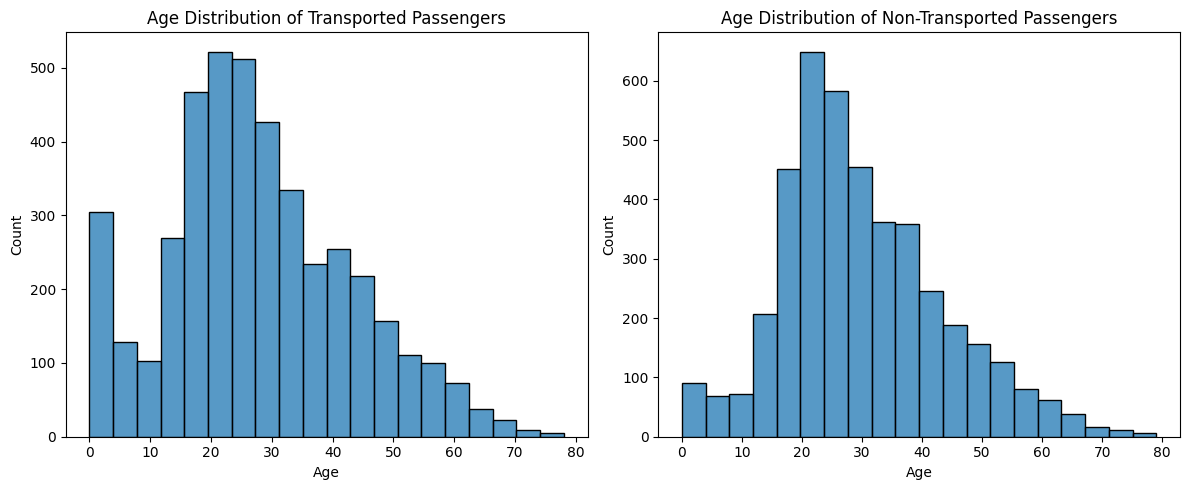

In [33]:
# Create subplots for multiple visualizations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Visualization 1: Histogram of Ages for Transported Passengers
sns.histplot(data=dataset[dataset['Transported'] == 1]['Age'], ax=axes[0], bins=20)
axes[0].set_title('Age Distribution of Transported Passengers')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# Visualization 2: Histogram of Ages for Non-Transported Passengers
sns.histplot(data=dataset[dataset['Transported'] == 0]['Age'], ax=axes[1], bins=20)
axes[1].set_title('Age Distribution of Non-Transported Passengers')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

# Adjust subplot layout
plt.tight_layout()

# Show the plots
plt.show()

#### Boxplot showing age and Transported people

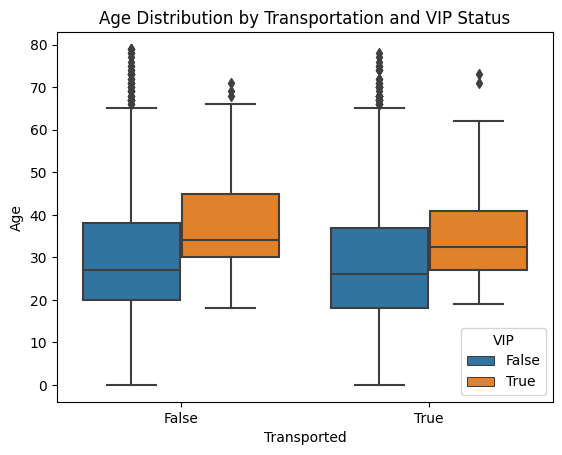

In [35]:
sns.boxplot(data=dataset, x='Transported', y='Age', hue='VIP')
plt.title('Age Distribution by Transportation and VIP Status')
plt.show()

#### Which are being tranported based on PassengerClass

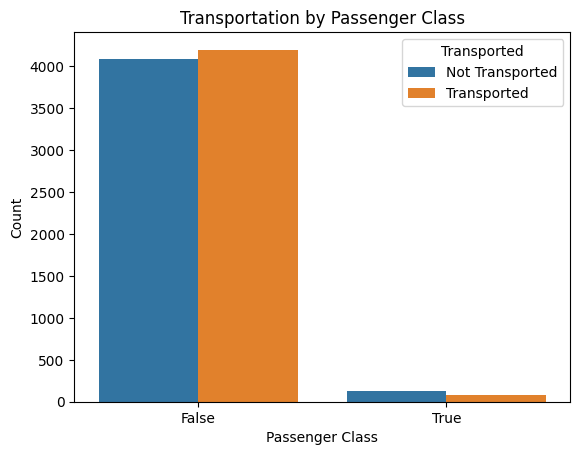

In [38]:
sns.countplot(data=dataset, x='VIP', hue='Transported')
plt.title('Transportation by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

/tmp/ipykernel_32/3073120214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conditions_data['Transported'] = dataset['Transported']


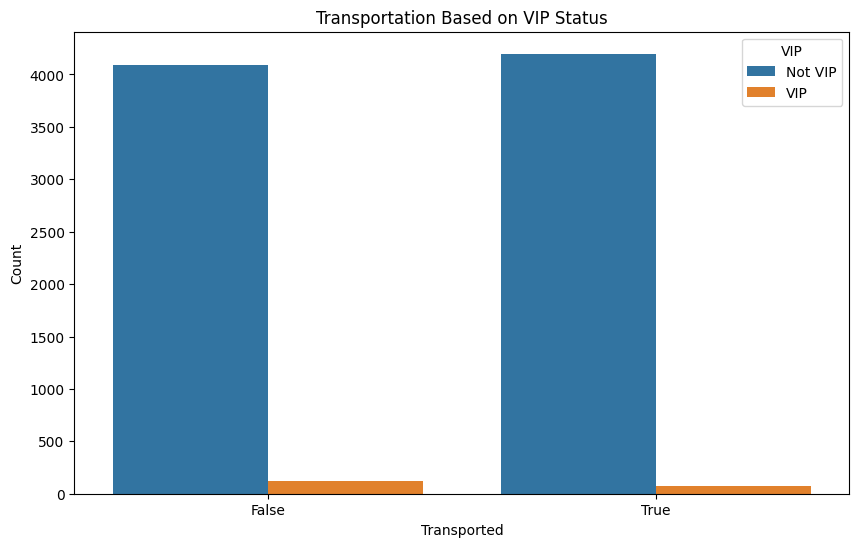

In [39]:
conditions = ['VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
conditions_data = dataset[conditions]
conditions_data['Transported'] = dataset['Transported']

plt.figure(figsize=(10, 6))
sns.countplot(data=conditions_data, x='Transported', hue='VIP')
plt.title('Transportation Based on VIP Status')
plt.xlabel('Transported')
plt.ylabel('Count')
plt.legend(title='VIP', labels=['Not VIP', 'VIP'])
plt.show()

#### We see passengers distribution based on their destination

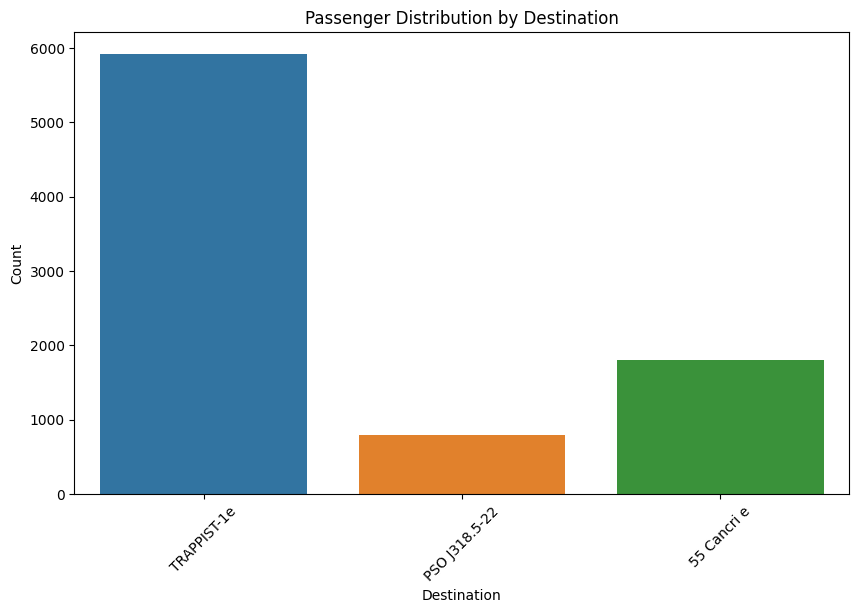

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Destination')
plt.title('Passenger Distribution by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

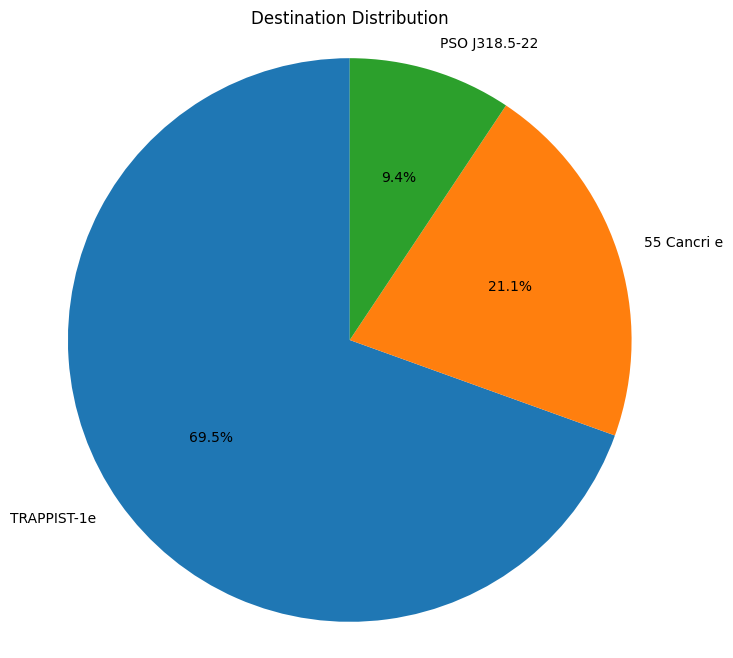

In [41]:
destination_counts = dataset['Destination'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(destination_counts, labels=destination_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Destination Distribution')
plt.axis('equal')
plt.show()

#### We see passengers distribution based on their destination and whether they are being transported

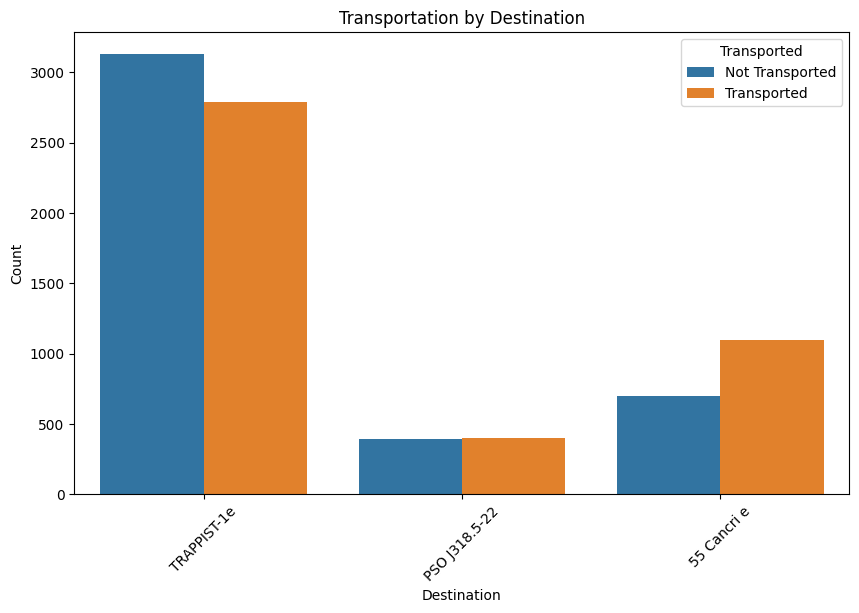

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='Destination', hue='Transported')
plt.title('Transportation by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()

#### We see cryosleep distribution in the dataset

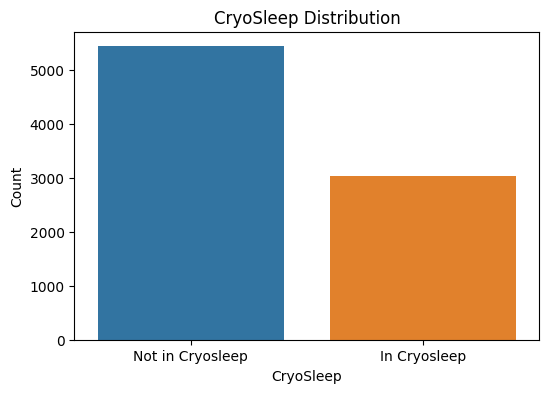

In [43]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='CryoSleep')
plt.title('CryoSleep Distribution')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not in Cryosleep', 'In Cryosleep'])
plt.show()

#### We see cryosleep distribution in the dataset based on VIPStatus

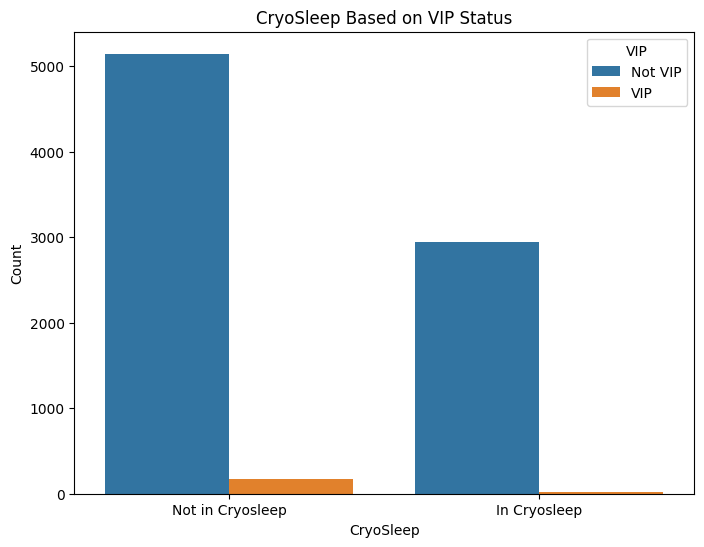

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='CryoSleep', hue='VIP')
plt.title('CryoSleep Based on VIP Status')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not in Cryosleep', 'In Cryosleep'])
plt.legend(title='VIP', labels=['Not VIP', 'VIP'])
plt.show()